### Importing required libraries

In [2]:
#List of Packages used
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import Embedding,LSTM,Bidirectional
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [3]:
#Reading processed files
file = open(r'C:\Users\amand\OneDrive\Desktop\tmp2\finished.txt', 'r',errors='ignore')
# read all text
text = file.read()
#Storing labels of text
labels = pd.read_csv(r'C:\Users\amand\OneDrive\Desktop\tmp2\new_labels.txt').label

In [4]:
#splitting the data making list
data= text.split('\n')[:-1]

In [6]:
#Intializing tokenizer
tokenizer = Tokenizer()

In [7]:
#Fitting tokenizer on data
tokenizer.fit_on_texts(data)

In [8]:
#converting tokens to sequence
encoded_docs = tokenizer.texts_to_sequences(data)

In [9]:
# Storing max lenght of instances in data
max_length = max([len(s.split()) for s in data])

In [10]:
#padding data
data= pad_sequences(encoded_docs,maxlen= max_length,padding='post')

In [11]:
#Converting labels to one hot encoder vector
oe_enc = OneHotEncoder()
labels = oe_enc.fit_transform(np.array(labels).reshape(-1,1)).toarray()

In [12]:
#Storing size of vocabulary
vocab_size = len(tokenizer.word_index)+1

In [33]:
#shuffling data,random state ensures same result every time it is run
data,labels = shuffle(data,labels)

In [34]:
#plotting accuracy and loss
def plot_accuracy(x,history_cnn):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("Accuracy comparison")
    plt.plot(x,history_cnn.history['accuracy'],label='Train')
    plt.plot(x,history_cnn.history['val_accuracy'],label='Test')
    plt.legend()
    plt.show()

def plot_loss(x,history_cnn):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("Loss comparison")
    plt.plot(x,history_cnn.history['loss'],label='Train')
    plt.plot(x,history_cnn.history['val_loss'],label='Test')
    plt.legend()
    plt.show()

In [35]:
#splitting data to train and validation set
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=42,test_size=0.30,shuffle=True)
#no. of times LSTM model should run
epochs = 100
#number of features
n_features = X_train.shape[1]
#number of outputs
n_outputs= Y_train.shape[1]

In [36]:
#reshaping data for lstm input as it takes data with three dimension 1.number of instances 2.number of sequence to be passed 3.no. of features
X_train1 = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test1 = np.array(X_test).reshape((X_test.shape[0] , 1, X_test.shape[1]))

# Defining Custom model (can be improved)

In [37]:
#defining model LSTM
model = Sequential(name='LSTM')
#Adding 100 lstm cells with relu activation function
model.add(LSTM(524, activation='relu', return_sequences=True,input_shape=( 1, n_features)))
#Adding 120 lstm cells with relu activation function
model.add(LSTM(120, activation='relu'))
#connecting fully connected eep neural networks
model.add(Dense(224,activation='relu'))
#adding droput to eliminate chances of overfitting
model.add(Dropout(0.5))
model.add(Dense(124,activation='relu'))
model.add(Dropout(0.5))
#last layer of model
model.add(Dense(n_outputs,activation='sigmoid'))
#defining Adam optimizer with learning rate 0.001
opt = Adam(lr = 0.001)
#Defining loss function, metrics
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=['accuracy'])
#printing model summary
print(model.summary())

Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 524)            8878656   
_________________________________________________________________
lstm_5 (LSTM)                (None, 120)               309600    
_________________________________________________________________
dense_6 (Dense)              (None, 224)               27104     
_________________________________________________________________
dropout_4 (Dropout)          (None, 224)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 124)               27900     
_________________________________________________________________
dropout_5 (Dropout)          (None, 124)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 1000   

In [38]:
#fitting data to model
history = model.fit(X_train1,Y_train,epochs=epochs,verbose=1,validation_data = (X_test1,Y_test),batch_size=4)

Epoch 1/100
78/78 [==============================] - 7s 92ms/step - loss: 4.8126 - accuracy: 0.1452 - val_loss: 2.3105 - val_accuracy: 0.1353
Epoch 2/100
78/78 [==============================] - 7s 87ms/step - loss: 3.0971 - accuracy: 0.1161 - val_loss: 2.1832 - val_accuracy: 0.0902
Epoch 3/100
78/78 [==============================] - 7s 85ms/step - loss: 2.7253 - accuracy: 0.1258 - val_loss: 2.0693 - val_accuracy: 0.1353
Epoch 4/100
78/78 [==============================] - 6s 83ms/step - loss: 2.3634 - accuracy: 0.1452 - val_loss: 2.1769 - val_accuracy: 0.1203
Epoch 5/100
78/78 [==============================] - 7s 87ms/step - loss: 2.4941 - accuracy: 0.1323 - val_loss: 2.4511 - val_accuracy: 0.1203
Epoch 6/100
78/78 [==============================] - 7s 84ms/step - loss: 2.5240 - accuracy: 0.1129 - val_loss: 2.0657 - val_accuracy: 0.1128
Epoch 7/100
78/78 [==============================] - 7s 84ms/step - loss: 2.4150 - accuracy: 0.1226 - val_loss: 2.0627 - val_accuracy: 0.1203
Epoch 

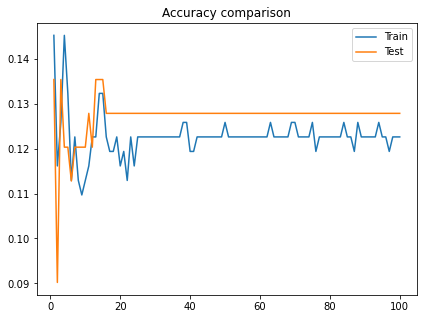

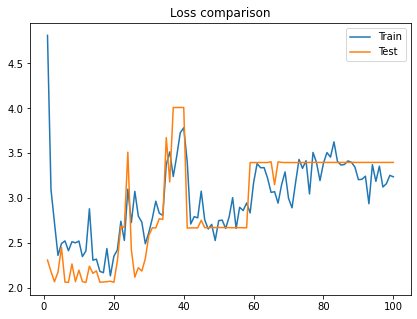

In [39]:
x = [i for i in range(1,epochs+1)]
#plotting i'th epoch's accuracy
plot_accuracy(x,history)
#plotting i'th epoch's loss
plot_loss(x,history)

In [40]:
#using sklearn's api to store confusion_matrix
co = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(model.predict(X_test1),axis=1))

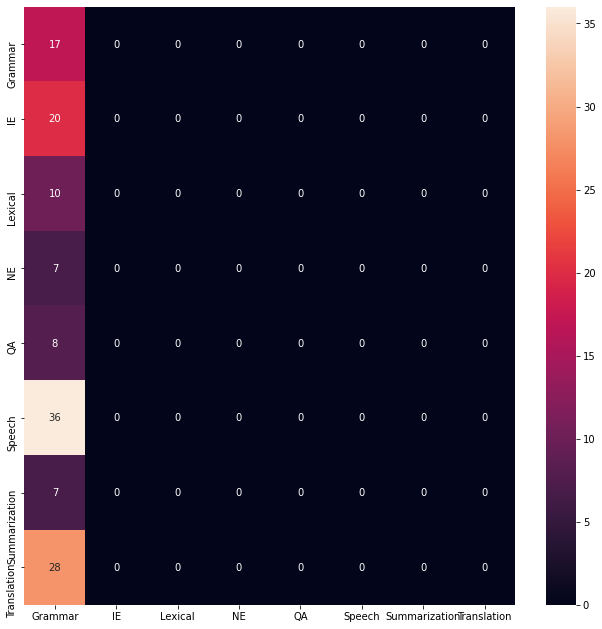

In [21]:
#Plotting confusion matrix of LSTM model

#Defining figure size
plt.figure(figsize=(11,11))
#subplot
ax= plt.subplot()
#plotting heatmap
sns.heatmap(co, annot=True, ax = ax)
#setting X-axis and Y_axis labels
ax.xaxis.set_ticklabels(oe_enc.categories_[0]); ax.yaxis.set_ticklabels(oe_enc.categories_[0]);

In [41]:
#Multinomial Naive Bayes
clf = MultinomialNB()
#Taking scores for each batch
scores = cross_val_score(clf, data,np.argmax(labels,axis=1), cv=10)

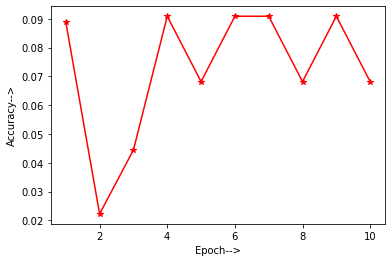

In [42]:
#Plotting accuracy
plt.plot(range(1,11),scores,'r*-')
plt.ylabel('Accuracy-->')
plt.xlabel('Epoch-->')
plt.show()

Accuracy: 0.15037593984962405


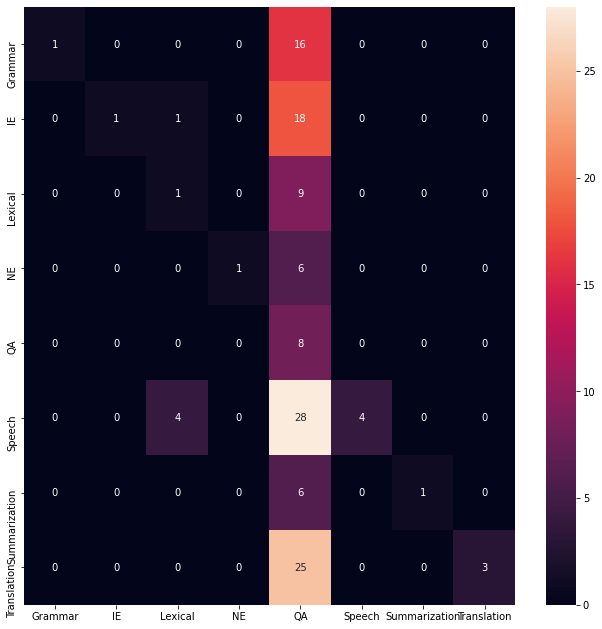

In [24]:
clf.fit( data,np.argmax(labels,axis=1))
#defining confusion matrix
co = confusion_matrix(np.argmax(Y_test,axis=1),clf.predict(X_test))
plt.figure(figsize=(11,11))
ax= plt.subplot()
#plotting confusion matrix
sns.heatmap(co, annot=True, ax = ax)
ax.xaxis.set_ticklabels(oe_enc.categories_[0]); ax.yaxis.set_ticklabels(oe_enc.categories_[0]);
print("Accuracy:",accuracy_score(np.argmax(Y_test,axis=1),clf.predict(X_test)))

In [43]:
#Svm model

from sklearn.svm import SVC
#fitting svm classifier
svc_clf =  SVC().fit(X_train,np.argmax(Y_train,axis=1))

In [44]:
#taking scores for each batch
scores = cross_val_score(svc_clf, data,np.argmax(labels,axis=1), cv=10)

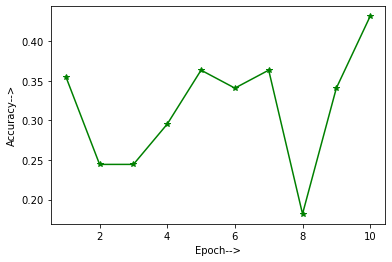

In [45]:
plt.plot(range(1,11),scores,'g*-')
plt.ylabel('Accuracy-->')
plt.xlabel('Epoch-->')
plt.show()

Accuracy: 0.3308270676691729


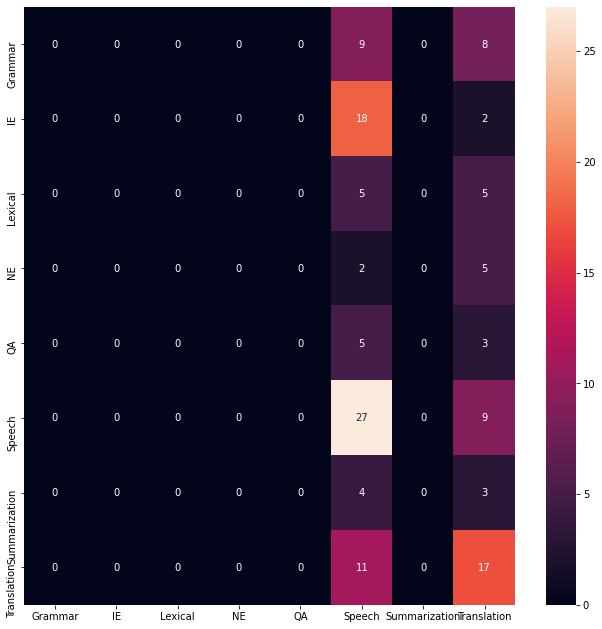

In [46]:
#defining confusion matrix
co = confusion_matrix(np.argmax(Y_test,axis=1),svc_clf.predict(X_test))
plt.figure(figsize=(11,11))
ax= plt.subplot()
#plotting confusion matrix
sns.heatmap(co, annot=True, ax = ax)
ax.xaxis.set_ticklabels(oe_enc.categories_[0]); ax.yaxis.set_ticklabels(oe_enc.categories_[0]);
print("Accuracy:",accuracy_score(np.argmax(Y_test,axis=1),svc_clf.predict(X_test)))

In [28]:
pip freeze>requirements.txt

Note: you may need to restart the kernel to use updated packages.
